### Lab: Titanic EDA

#### Step 1: Reading the data

In [637]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import math
import datetime
%matplotlib inline

In [638]:
#Loading thr train csv file
train = pd.read_csv('../2.01-lab-titanic/train.csv')

#### Step 2: Cleaning the data
Create a bar chart showing how many missing values are in each column

Source: https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python

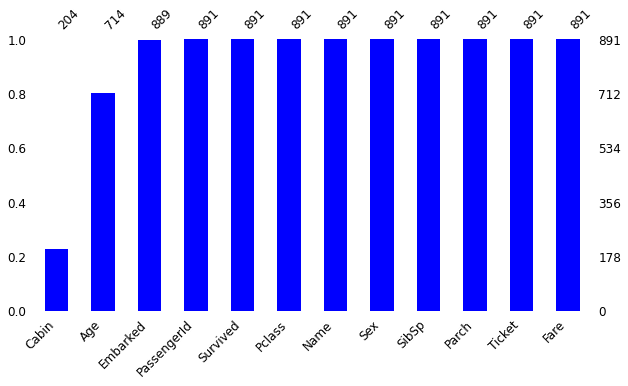

In [639]:
# To identify the missing values with ascending order 
missingno.bar(train, figsize=(10,5), color="Blue", sort="ascending", fontsize=12);

In [640]:
# To find the nubmer of nan values acrose the DataFrame  
count_nan = train.isnull().sum()
count_nan[count_nan > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

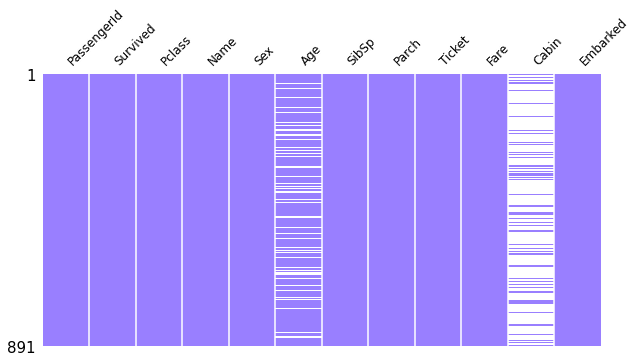

In [641]:
# To map the missing values acrose the DataFrame without sparkline in the figure
missingno.matrix(train, sparkline=False, figsize=(10,5), fontsize=12, color=(0.6, .5, 1.0));

Which column has the most NaN values? How many cells in that column are empty?

###### Answer: Cabin has 687 NaN values out of 891 values.

In [642]:
# To find the nubmer of nan values in the dataframe
train_null = train.isnull().sum()
train_null[train_null > 0].sort_values(ascending=True)


Embarked      2
Age         177
Cabin       687
dtype: int64

In [643]:
# Perecentage ratio of the nan values in each column in the DataFrame 
null_train = pd.DataFrame(train.isnull().sum())*100/len(train) 
null_train = round(null_train, 2)
null_train[0].sort_values(ascending = False)[:4]

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name: 0, dtype: float64

In [644]:
train.shape

(891, 12)

In [645]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [646]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [647]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [648]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Delete all rows where Embarked is empty

In [649]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [650]:
train.shape

(891, 12)

In [651]:
# Check empty values in the "Embarked" perior to delet
embarked_nan = train['Embarked'].isnull()
train.loc[embarked_nan, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [652]:
# Delete the missing value from the "Embarked"
train.dropna(subset = ["Embarked"], inplace=True)

In [653]:
# Check the missing values in "Embarked" removed
null_train = train.isnull().sum()
null_train[null_train > 0].sort_values(ascending=True)

Age      177
Cabin    687
dtype: int64

In [654]:
# Check the values in "Embarked" 
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [655]:
# Check the missing values in "Embarked" in the DateFrame
embarked_nan = train['Embarked'].isnull()
train.loc[embarked_nan, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Fill all empty cabins with ¯(ツ)/¯

In [656]:
# Check the missing values in "Cabine" in the DateFrame before fill
Cabin_nan = train['Cabin'].isnull()
train.loc[Cabin_nan, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [657]:
# Fill all empty cabins with "¯(ツ)/¯"
train['Cabin'].fillna('¯\(ツ)/¯',inplace=True)

In [658]:
# check the existance of nan in the DataFrame
train['Cabin'].isnull().values.any()

False

In [659]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [660]:
# There is no missing values in the Cabin in the DataFrame
Cabin_nan = train['Cabin'].isnull()
train.loc[Cabin_nan, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [661]:
# The missing values in the Age in the DataFrame
age_nan = train['Age'].isnull()
train.loc[age_nan, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,¯\(ツ)/¯,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,¯\(ツ)/¯,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,¯\(ツ)/¯,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,¯\(ツ)/¯,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,¯\(ツ)/¯,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,¯\(ツ)/¯,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,¯\(ツ)/¯,S


In [662]:
train.shape

(889, 12)

In [663]:
# To look theire is nan values in the DataFrame
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

#### Step 3: Feature extraction

There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.
Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies

In [664]:
# Create FamilyCount
train['FamilyCount'] = train['SibSp'] + train['Parch']

In [665]:
# Coverting the values to "0" and "1"
def reverend_name(yy):
    strings = yy.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0
reverend_name('Williams, Rev. John Bradley preach the survivor') # to evalate the performance

1

In [666]:
# Apply the ISReverend to the DataFrame train
train['IsReverend'] = train['Name'].apply(reverend_name)

In [667]:
#The columns added to the DataFrame
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
Do the same thing for Sex
BONUS: Extract the title from everyone's name and create dummy columns

In [668]:
# Dummy columns from "Embarked" Column
train_embarked = pd.get_dummies(train, columns=['Embarked'])

In [669]:
train_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [670]:
# Dummy columns from "Sex" Column
train_sex = pd.get_dummies(train, columns=['Sex'])


In [671]:
train_sex.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1


#### Step 4: Exploratory analysis

What was the survival rate overall?  df.groupby() may be very useful.


In [672]:
# Group the survival and calculate the lenght of survival in the DataFrame
survival = train_embarked.groupby("Survived")
survival.groups
print(f"{len(train['Survived'])} is the lenght of survival")

889 is the lenght of survival


In [673]:
# What was the survival rate overall?
survivors_total = train_embarked[train_embarked.columns[1]].sum()

survival_rate = (survivors_total*100) / len(train_embarked['Survived'])

print(f"{survival_rate} is the overall survival rate")

38.24521934758155 is the overall survival rate


Which gender fared the worst? What was their survival rate?

In [674]:
# Overall male survivors
male_train = [gender == "male" for gender in train_embarked.Sex]

maleSurvival = [survived for index, survived in enumerate(train_embarked.Survived) if male_train[index]]
maleSurvival = sum(np.array([maleSurvival]))

print(f'{sum(maleSurvival)} is the overall male survival') # 'sum' take only the survived value with '1'

female_train = [gender == 'female' for gender in train_embarked.Sex]
femaleSurvival = [survived for index, survived in enumerate(train_embarked.Survived) if female_train[index]]
femaleSurvival = sum(np.array([femaleSurvival]))
femaleSurvival

print(f'{sum(femaleSurvival)} is the overall female survival')# 'sum' escape the '0' value(not survived)

109 is the overall male survival
231 is the overall female survival


In [675]:
# What was their survival rate?
maleSurvival_rate = (sum(maleSurvival)* 100 / np.array([male_train]).sum())
femaleSurvival_rate =(sum(femaleSurvival)*100 / np.array([female_train]).sum())

print(f'{maleSurvival_rate} is male survival rate')
print(f'{femaleSurvival_rate} is female survival rate')

18.890814558058924 is male survival rate
74.03846153846153 is female survival rate


What was the survival rate for each Pclass?

In [676]:
# values in the Pclass column.
train_embarked['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [677]:
# What was the survival rate for each Pclass?
totalSurvivors = train_embarked[train_embarked.columns[1]].sum()
tS = totalSurvivors

pc1 = [xx == 1 for xx in train_embarked.Pclass] # "xx"  is the passangers
pc2 = [xx == 2 for xx in train_embarked.Pclass]
pc3 = [xx == 3 for xx in train_embarked.Pclass]


pc1Survival = [survived for index, survived in enumerate(train_embarked.Survived) if p_1[index]]
pc1Survival = np.array([pc1Survival])
pc1Survival_rate = (pc1Survival.sum()*100 / tS)

print(f'{round(pc1Survival_rate, 2)} is the first class survival rate')

39.41 is the first class survival rate


In [678]:
pc2Survival = [survived for index, survived in enumerate(train_embarked.Survived) if pc2[index]]
pc2Survival = np.array([p_2Survival])
pc2Survival_rate = (p_2Survival.sum()*100 / tS) #tS total survivor numbers

print(f'{round(pc2Survival_rate, 2)} is the second class survival rate')

25.59 is the second class survival rate


In [679]:
pc3Survival = [survived for index, survived in enumerate(train_embarked.Survived) if pc3[index]]
pc3Survival = np.array([pc3Survival])
pc3Survival_rate = (pc3Survival.sum()*100 / tS)


print(f'{round(pc3Survival_rate, 2)} is third class survival rate')

35.0 is third class survival rate


In [681]:
train_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [682]:
train_embarked.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,0,0,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,0,0,0,1,0


Did any reverends survive? How many?

In [683]:
# Did any reverends survive? How many?
reverendMask = [survival == 1 for gender in train_embarked.IsReverend]
reverendMask = np.array([reverendMaask])
yy = reverendMask.sum()
print(f'{yy} there is no any reverends survive')

0 there is no any reverends survive


What is the survival rate for cabins marked ¯\(ツ)/¯

In [684]:
# I tried with the command below but I don't know why it doesn't work for substitute nan of cabins by ¯\(ツ)/¯

#cabin_survival_rate = train_embarked.groupby('Cabin')['Survived'].sum()*100 /train_embarked.groupby('Cabin')['PassengerId'].count() 
#cabin_survival_rat.filt(item==["¯\(ツ)/¯"])

What is the survival rate for people whose Age is empty?

In [685]:
#What is the survival rate for people whose Age is empty

age_empty = [pd.isnull(x) for x in train_embarked.Age]
ageSurvival = [age for index, age in enumerate(train_embarked.Survived) if age_empty[index]]
ageSurvival = np.array([ageSurvival])
ageSurvival_rate = (ageSurvival.sum()* 100 / tS)
ageSurvival_rate
print(f'{round(ageSurvival_rate, 2)} is survival rate of age values missed')

15.29 is survival rate of age values missed


What is the survival rate for each port of embarkation?

In [686]:
#What is the survival rate for each port of embarkation?

c_port = [yy == 1 for yy in train_embarked.Embarked_C]
c_survival = [c for index, c in enumerate(train_embarked.Survived) if c_port[index]]
c_survival = np.array([c_survival])
c_survival_rate = (c_survival.sum()*100 / tS)

print(f'{c_survival_rate} is the survival rate at c_port')

27.352941176470587 is the survival rate at c_port


In [687]:
# The survival rate for embarking from Q
q_port = [yy == 1 for yy in train_embarked.Embarked_Q]
q_survival = [q for index, q in enumerate(train_embarked.Survived) if q_port[index]]
q_survival = np.array([q_survival])
q_survival_rate = (q_survival.sum()*100 / tS)

print(f'{q_survival_rate} is the survival rate at q_port')

8.823529411764707 is the survival rate at q_port


In [688]:
#The survival rate for embarking s
s_port = [yy == 1 for yy in train_embarked.Embarked_S]
s_survival = [s for index, s in enumerate(train_embarked.Survived) if s_port[index]]
s_survival = np.array([s_survival])
s_survival_rate = (s_survival.sum()*100 / tS)

print(f'{s_survival_rate} is the survival rate at s_port')

63.8235294117647 is the survival rate at s_port


What is the survival rate for children (under 12) in each Pclass?

In [689]:
# What is the survival rate for children (under 12) in each Pclass
train_embarked_12 = train_embarked[train_embarked['Age'] < 12]
xx = train_embarked_12.groupby('Pclass')['Survived'].sum() #total survival by Pclass 
yy = train_embarked_12.groupby('Pclass')['PassengerId'].count() # the total count of 

survivalRate_under12 = xx*100/yy

print(f'{survivalRate_under12} rate of survival age under 12')

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64 rate of survival age under 12


Did the captain of the ship survive? Is he on the list?

In [690]:
#The person who din't survive and bought expensive ticket
xxx = train_embarked.sort_values(by=['Fare', 'Survived'], ascending=False)
xxx.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,¯\(ツ)/¯,0,0,1,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,1,0,1,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,0,0,1,0,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1


Does having family on the boat help or hurt your chances of survival?

In [691]:
family_help = train.sort_values(by='FamilyCount', ascending=False)
family_help.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0


In [692]:
# family help or hurt for surviving
train_embarked_fam = train_embarked[train_embarked['FamilyCount'] > 1] # help for survival
ff = train_embarked_fam.groupby('FamilyCount')['Survived'].sum() #total survival family 
ff_sum = train_embarked_fam.groupby('FamilyCount')['Survived'].count() # the total count of 

helpedRate_byfam = ff*100/ff_sum

print(f'{helpedRate_byfam}')

FamilyCount
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


In [693]:
train_embarked_nofam = train_embarked[train_embarked['FamilyCount'] < 1] # family not survived
famhurt = train_embarked_nofam.groupby('FamilyCount')['Survived'].sum() 
famhurt_sum = train_embarked_nofam.groupby('FamilyCount')['PassengerId'].count() 

RateNo_survivalfam = famhurt*100/famhurt_sum;

print(f'{RateNo_survivalfam} not survived family')

FamilyCount
0    30.093458
dtype: float64 not survived family


#### Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface

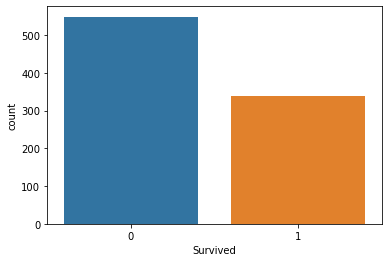

In [694]:
# this figure shows how many people died and survive
sns.countplot(x ='Survived', data = train_embarked)
plt.show()

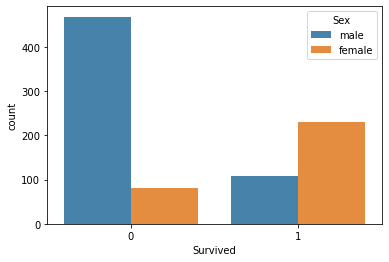

In [695]:
#gender survival in the DataFrame
sns.countplot(x ='Survived',hue='Sex', data = train_embarked,alpha=0.9)
plt.show()

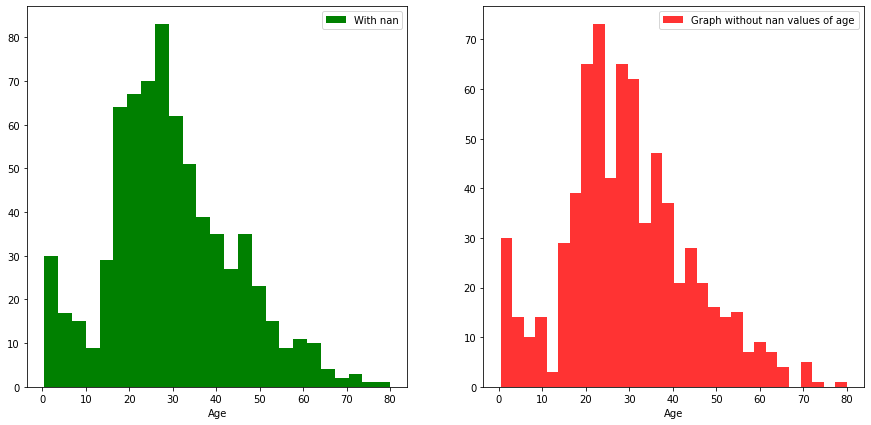

In [696]:
# Without nan value the age distribution of the passangers
fig, ax  = plt.subplots(nrows = 1 , ncols=2 ,figsize=(15,7))
nullRemoved_train = train_embarked.copy() # copy the DataFrame not to remove from the original 
nullRemoved_train.dropna(subset = ["Age"], inplace=True)

ax[0].hist(train_embarked['Age'], color='green' ,label='With nan',bins=25);
ax[0].legend();
ax[0].set_xlabel('Age');
ax[1].hist(nullRemoved_train['Age'],color='red',alpha = 0.8, label='Graph without nan values of age',bins=30);
ax[1].legend();
ax[1].set_xlabel('Age');


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

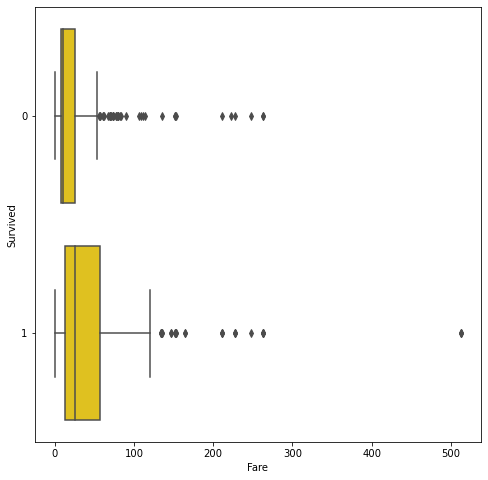

In [697]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(x="Fare", y="Survived", data=train_embarked, orient='h', color='gold')

In [698]:
#Statistical description indicates Survived and Fare
train_embarked.groupby("Survived")[["Fare"]].describe().T

Survived             0           1
Fare count  549.000000  340.000000
     mean    22.117887   48.209498
     std     31.388207   66.748773
     min      0.000000    0.000000
     25%      7.854200   12.443750
     50%     10.500000   26.000000
     75%     26.000000   56.946900
     max    263.000000  512.329200

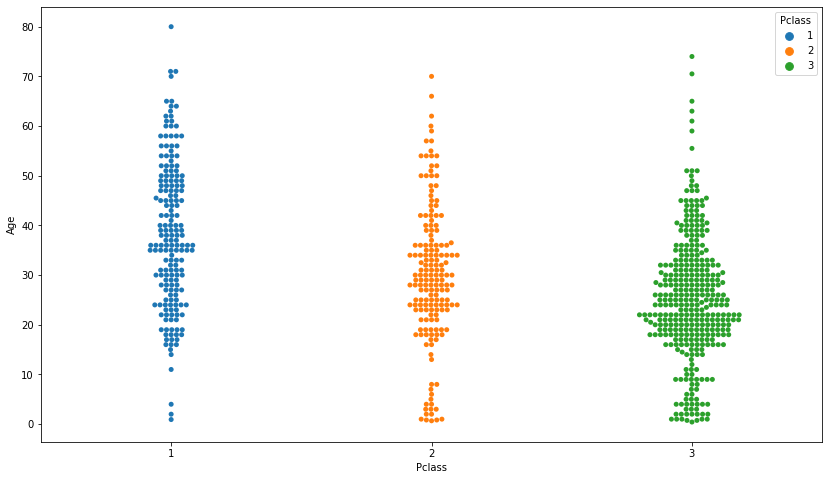

In [699]:
# plote with Pclass vs Age
fig,ax = plt.subplots(figsize=(14,8))
sns.swarmplot(x='Pclass',y='Age', hue="Pclass", data = train_embarked);

<function matplotlib.pyplot.show(close=None, block=None)>

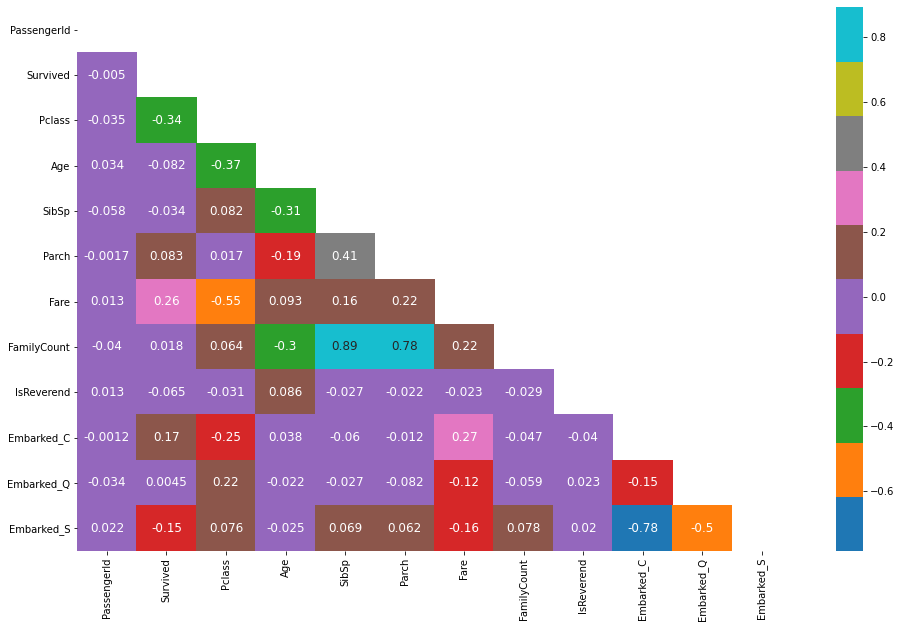

In [700]:
# It uses for to check the correlation of the values
plt.figure(figsize=(16,10))
mask = np.zeros_like(train_embarked.corr());
mask[np.triu_indices_from(mask)] = True; # hide the upper triangle of the graph
sns.heatmap(train_embarked.corr(), annot=True, mask=mask, annot_kws={'size': 12}, cmap="tab10")
plt.show